In [ ]:
!pip install chart-studio

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix,classification_report
from sklearn.utils.multiclass import unique_labels
print(os.getcwd())
pd.set_option('display.max_rows', 500)

C:\Users\hp\Desktop


In [2]:
friday_afternoon_ddos = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Friday-WorkingHours-Afternoon-DDos.csv',low_memory = False)
# friday_afternoon_portscan = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Friday-WorkingHours-Afternoon-PortScan.csv',low_memory = False)
# friday_morning = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Friday-WorkingHours-Morning.csv',low_memory = False)
# monday = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Monday-WorkingHours.csv',low_memory = False)
# thursday_infilteration = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Thursday-WorkingHours-Afternoon-Infilteration.csv',low_memory = False)
# tuesday = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Tuesday-WorkingHours.csv',low_memory = False)
# wednesday = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Wednesday-workingHours.csv',low_memory = False)
# thursday_webattacks = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Thursday-WorkingHours-Morning-WebAttacks.csv', engine='python')

In [3]:
friday_afternoon_ddos = friday_afternoon_ddos.rename(str.lstrip, axis='columns')
# friday_afternoon_portscan = friday_afternoon_portscan.rename(str.lstrip, axis='columns')
# friday_morning = friday_morning.rename(str.lstrip, axis='columns')
# monday = monday.rename(str.lstrip, axis='columns')
# thursday_infilteration = thursday_infilteration.rename(str.lstrip, axis='columns')
# thursday_webattacks = thursday_webattacks.rename(str.lstrip, axis='columns')
# tuesday = tuesday.rename(str.lstrip, axis='columns')
# wednesday = wednesday.rename(str.lstrip, axis='columns')

In [4]:
df = friday_afternoon_ddos
print(df['Label'].unique())
number = LabelEncoder()
df["Label"] = number.fit_transform(df["Label"])
print(df.shape)
#print(df.isnull().sum())
#print(df.select_dtypes(include=['float64']))
df = df.select_dtypes(exclude=['object'])

['BENIGN' 'DDoS']
(225745, 85)


In [5]:
X = df.loc[:, df.columns != "Label"].values
y = df.loc[:, df.columns == "Label"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123,stratify = y)

In [6]:
std = RobustScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

rf_clf = RandomForestClassifier(n_estimators=500, max_features=0.25, criterion="entropy", class_weight="balanced")
rf_clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features=0.25,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

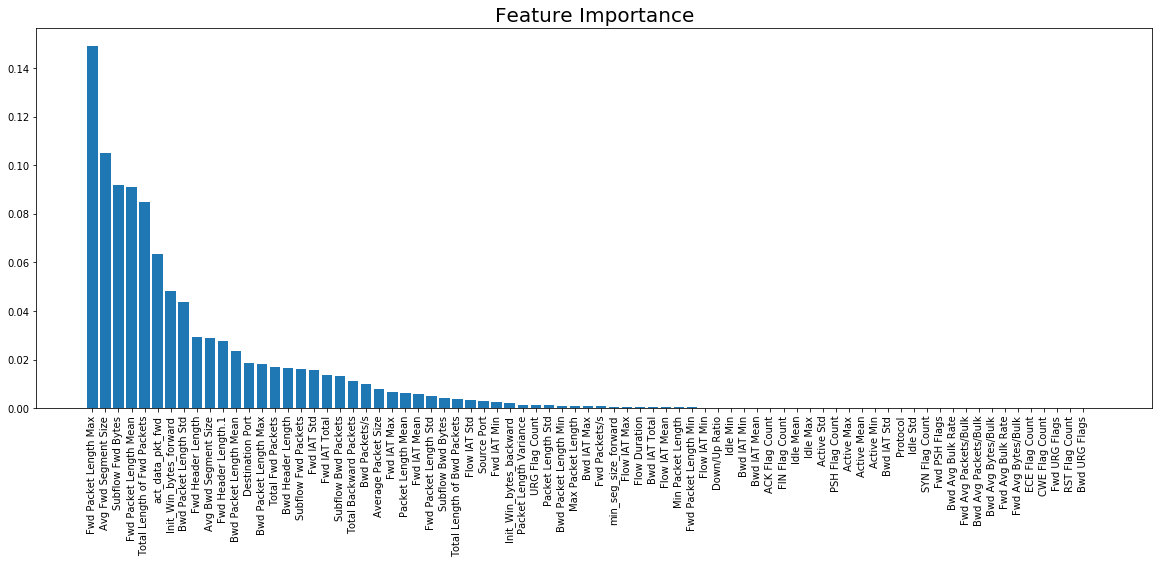

In [11]:
importances = rf_clf.feature_importances_
indices = np.argsort(rf_clf.feature_importances_)[::-1]
pos = np.arange(len(importances))
plt.figure(figsize=(20, 7))
plt.bar(pos, importances[indices], align="center")
plt.xticks(range(0, 77),
           df.columns[df.columns != "Label"][indices],
           rotation=90)
plt.title("Feature Importance", {"fontsize": 20});
plt.show()

# importances = rf_clf.feature_importances_
# print(importances)
# indices = np.argsort(rf_clf.feature_importances_)[::-1]
# pos = np.arange(len(importances))
# plt.figure(figsize=(20, 7))
# plt.bar(pos, importances[indices], align="center")
# print(importances[indices])
# plt.xticks(range(0, len(df.columns)),
#            df.columns[df.columns != 'theme'][indices],
#            rotation=90, fontsize= 16)
# plt.title("Feature Importance", {"fontsize": 30});
# plt.show()

In [ ]:
std = RobustScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [ ]:
logreg_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',n_jobs = 3)

rf_clf = RandomForestClassifier(n_estimators=500, max_features=0.25, criterion="entropy", class_weight="balanced")

#mathdomainerror still
pca_clf = PCA(n_components='mle')

ann_clf = MLPClassifier(activation = 'logistic')

lda_clf = LinearDiscriminantAnalysis(solver='svd')

knn_clf = KNeighborsClassifier(n_neighbors=3)

nb_clf = GaussianNB()

dtree_clf = DecisionTreeClassifier()


models = {"logreg": logreg_clf,
            "rf": rf_clf,
            "Neural-Network": ann_clf,
            "LDA" : lda_clf,
            "KNN" : knn_clf,
            "Naive-Bayes" : nb_clf,
            "Decision-Tree" : dtree_clf}


In [ ]:
Scores = []
# INSERT  IN CLASSIFIER
Classifiers = [logreg_clf,rf_clf,ann_clf,lda_clf,knn_clf,nb_clf,dtree_clf]
def Utility():
    for x in Classifiers:
        print(str(x))
        score = (cross_val_score(x, X, y, cv=7))
        Scores.append(score)
        print(score)
        

Utility()

In [ ]:
for x in Scores:
    print(np.mean(x))

In [ ]:

#prints classificationreport , ROC, PR, and CM
def plot_confusion_matrix(y_true, y_pred,normalize=True,title=None,cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    classes = np.unique(y_test)
    np.append(classes,np.unique(y_pred))
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    labels = number.inverse_transform(list(set(classes)))
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    return ax

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
#y_pred = []
Classifiers = [logreg_clf]
for name,model in models.items() :
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1:]
    print(classification_report(y_test, y_pred,target_names = number.inverse_transform(np.unique(y_test))))
    plot_confusion_matrix(y_test,y_pred, title = str(model).split('(')[0])
    precision, recall,_ = precision_recall_curve(y_test, y_prob)
    model_auc_score = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    axes[0].plot(fpr, tpr, label= f"{name}, auc = {model_auc_score:.3f}")
    axes[1].plot(recall, precision, label= f"{name}")

axes[0].legend(loc="lower right")
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR")
axes[0].set_title("ROC curve")
axes[1].legend()
axes[1].set_xlabel("recall")
axes[1].set_ylabel("precision")
axes[1].set_title("PR curve")
plt.tight_layout()
plt.show()

In [ ]:
#change this
knn_clf.fit(X_train,y_train)
predicted_labels = knn_clf.predict(X_test)
print(accuracy_score(y_test, predicted_labels))

In [ ]:
print(fpr)
print(tpr)

In [ ]:

#metalearner 2 averaging
voting_clf = VotingClassifier([("logreg", logreg_clf),
                               ("rf", rf_clf)],
                              voting="soft",
                              flatten_transform=True)

voting_clf.fit(X_train, y_train)

print("check2")
logreg_model, rf_model = voting_clf.estimators_
print("check3")
models = {"logreg": logreg_model,
          "rf": rf_model,
"avg_ensemble": voting_clf}

print("check4")
first_stack = make_pipeline(voting_clf,
                            FunctionTransformer(lambda X: X[:, 1::2]))

print("check5")
# Use CV to generate meta-features

"""
meta_features = cross_val_predict(first_stack, X_train, y_train, cv=10, method="transform")


# Refit the first stack on the full training set
first_stack.fit(X_train, y_train)

print("check6")

# Fit the meta learner
#second_stack = xgb_clf.fit(meta_features, y_train)
test_meta = cross_val_predict(first_stack, X_test, y_test, cv=10, method="transform")
#acc = accuracy_score(y_test,second_stack.predict(test_meta))
#print("Accuracy score using stacking ensemble model", acc)
acc2 = accuracy_score(y_test,voting_clf.predict(X_test))
print("Accuracy score using averaging ensemble model", acc2)
"""

In [ ]:
acc2 = accuracy_score(y_test,voting_clf.predict(X_test))
print("Accuracy score using averaging ensemble model", acc2)

NameError: name 'y_test' is not defined

In [39]:
results_dict_friday_afternoon_ddos = {'logreg': [0.72220155, 0.93618605, 0.95661881, 0.91481906, 0.91990449,
        0.91345468, 0.56659121],
 'rf': [0.99993798, 0.99993798, 1.        , 0.9996279 , 0.99993798,
        0.99993798, 0.99863562],
 'Neural-Network': [0.90254264, 0.93209302, 0.94099042, 0.93392043, 0.86380973,
        0.8793451 , 0.83928184],
 'LDA': [0.89857364, 0.98427907, 0.99441843, 0.99596887, 0.9889609 ,
        0.9768675 , 0.79444324],
 'KNN': [0.98235659, 0.98489922, 0.99444944, 0.99010822, 0.9925269 ,
        0.98958107, 0.96111507],
 'Naive-Bayes': [0.51482171, 0.8575814 , 0.90706689, 0.87336041, 0.83425843,
        0.81431982, 0.33201029],
 'Decision-Tree': [0.99947287, 0.99981395, 0.99996899, 0.9996589 , 0.99987597,
        0.99984496, 0.99860461],
 'ADA': [1.        , 0.99993798, 1.        , 0.9996279 , 0.99996899,
        0.99993798, 0.99854259],
 'XGBoost': [0.99972093, 0.99990698, 1.        , 0.99975193, 0.99993798,
        0.99993798, 0.99897671]}

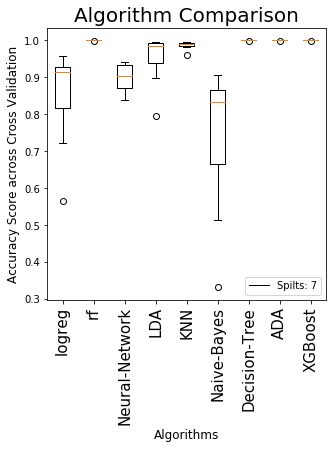

In [40]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.boxplot(results_dict_friday_afternoon_ddos.values())
ax.set_xticklabels(results_dict_friday_afternoon_ddos.keys(), rotation = 90, fontsize=15)
# plt.xticks([str(x) for x in results_dict_friday_afternoon_ddos.keys()])
plt.title("Algorithm Comparison", fontsize=20)
plt.xlabel("Algorithms", fontsize=12) 
plt.ylabel("Accuracy Score across Cross Validation", fontsize=12)
plt.legend(['Spilts: 7'],loc="lower right", frameon = True, fancybox = True)
plt.show()

In [47]:
for x, y in results_dict_friday_afternoon_ddos.items():
    msg = "%s: %f (%f)" % (x, np.array(y).mean(), np.array(y).std())
    print(msg)

logreg: 0.847111 (0.135491)
rf: 0.999716 (0.000456)
Neural-Network: 0.898855 (0.036413)
LDA: 0.947645 (0.070005)
KNN: 0.985005 (0.010492)
Naive-Bayes: 0.733346 (0.203814)
Decision-Tree: 0.999606 (0.000436)
ADA: 0.999716 (0.000494)
XGBoost: 0.999748 (0.000329)


In [48]:
results_dict_friday_afternoon_portscan = {
    'logreg': [0.60458411, 0.5930261 , 0.69990714, 0.98128238, 0.98956602,
       0.9084156 , 0.8148474 ],
    'rf': [0.99980452, 0.99990226, 0.99987782, 1.        , 1.        ,
       0.99997556, 0.9997312 ], 
    'Neural-Network': [0.94443358, 0.9467794 , 0.90453035, 0.98717134, 0.98577852,
       0.96608347, 0.84969333],
    'LDA': [0.94223439, 0.95232626, 0.99266934, 0.99811846, 0.99929137,
       0.98612061, 0.97429318], 
    'KNN': [0.9973854 , 0.99762975, 0.99943798, 0.99892484, 0.99938911,
       0.9992425 , 0.9979718 ], 
    'Naive-Bayes': [0.28863259, 0.29413058, 0.879264  , 0.95777539, 0.9764197 ,
       0.79183364, 0.60327933], 
    'Decision-Tree': [0.99963347, 0.99975564, 0.99985339, 0.9995846 , 0.99997556,
       0.99990226, 0.99965789], 
    'ada': [0.99980452, 0.99982895, 0.99987782, 1.        , 1.        ,
       0.99997556, 0.99978007], 
    'xgb': [0.99970677, 0.99982895, 0.99992669, 1.        , 0.99997556,
       0.99995113, 0.99978007]
}

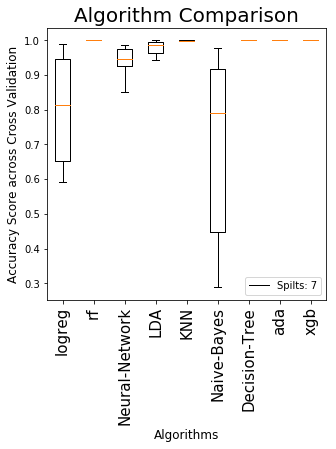

In [49]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.boxplot(results_dict_friday_afternoon_portscan.values())
ax.set_xticklabels(results_dict_friday_afternoon_portscan.keys(), rotation = 90, fontsize=15)
# plt.xticks([str(x) for x in results_dict_friday_afternoon_ddos.keys()])
plt.title("Algorithm Comparison", fontsize=20)
plt.xlabel("Algorithms", fontsize=12) 
plt.ylabel("Accuracy Score across Cross Validation", fontsize=12)
plt.legend(['Spilts: 7'],loc="lower right", frameon = True, fancybox = True)
plt.show()

In [50]:
friday_morning = {'logreg': [0.99974351, 0.99985343, 0.99490675, 0.97625504, 0.97255405,
       0.995786  , 0.98827409],
 'rf': [0.99959694, 0.99989007, 0.99974351, 0.99904727, 0.99813118,
       0.99978014, 0.99978014],
 'Neural-Network': [0.99992672, 0.99985343, 0.99472354, 0.97625504, 0.97255405,
       0.99530964, 0.98831074],
 'LDA': [0.98563629, 0.98691876, 0.9816423 , 0.97980945, 0.97599853,
       0.98754122, 0.98827409],
 'KNN': [0.99794804, 0.99820454, 0.99846103, 0.99596922, 0.99391719,
       0.99827776, 0.99820447],
 'Naive-Bayes': [0.41629108, 0.39599135, 0.35396284, 0.34917552, 0.40560645,
       0.38629535, 0.37489923],
 'Decision-Tree': [0.99912059, 0.99959694, 0.99952365, 0.99912056, 0.99802125,
       0.99959692, 0.99959692],
 'ada': [0.99959694, 0.99989007, 0.99981679, 0.9991572 , 0.99780139,
       0.99985343, 0.99978014],
 'xgb': [0.99945037, 0.99989007, 0.99978015, 0.99959692, 0.99798461,
       0.99989007, 0.99992671]
}

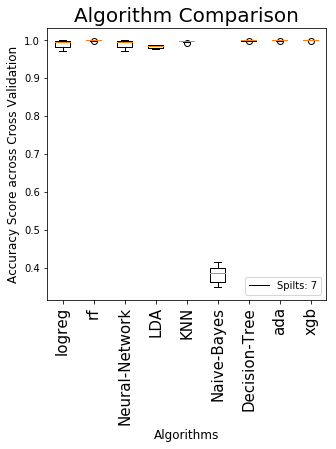

In [51]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.boxplot(friday_morning.values())
ax.set_xticklabels(friday_morning.keys(), rotation = 90, fontsize=15)
# plt.xticks([str(x) for x in results_dict_friday_afternoon_ddos.keys()])
plt.title("Algorithm Comparison", fontsize=20)
plt.xlabel("Algorithms", fontsize=12) 
plt.ylabel("Accuracy Score across Cross Validation", fontsize=12)
plt.legend(['Spilts: 7'],loc="lower right", frameon = True, fancybox = True)
plt.show()